In [38]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from src.reader import read_lusa, read_timebank

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']


ROOT = Path().resolve().parent.parent

## Prompt Selection

In [39]:
results_path = ROOT / "results" / "prompt_selection"

In [40]:
df_pt = pd.read_csv(results_path / "portuguese"/ "results.csv")
df_pt["language"] = "Portuguese"

df_en = pd.read_csv(results_path / "english"/ "results.csv")
df_en["language"] = "English"

df = pd.concat([df_pt, df_en])
df.reset_index(inplace=True, drop=True)
df

,model,template,entity,precision,recall,f1,f1_r,language
0,chatgpt,ext_exp,event triggers,0.428070,0.252066,0.317295,0.595667,Portuguese
1,chatgpt,ext,event triggers,0.456522,0.260331,0.331579,0.605356,Portuguese
2,chatgpt,cls,event triggers,0.433511,0.336777,0.379070,0.617449,Portuguese
3,chatgpt,cls_exp,event triggers,0.488571,0.353306,0.410072,0.640623,Portuguese
4,chatgpt,ext_def_exp,event triggers,0.583062,0.369835,0.452592,0.755066,Portuguese
...,...,...,...,...,...,...,...,...
355,llama2-7b-chat,cls_def_exp,time expressions,0.048387,0.024390,0.032432,0.065908,English
356,llama2-7b-chat,ext_exp,time expressions,0.052632,0.105691,0.070270,0.178076,English
357,llama2-7b-chat,ext,time expressions,0.053061,0.105691,0.070652,0.180918,English
358,llama2-7b-chat,ext_def_exp,time expressions,0.095960,0.154472,0.118380,0.232903,English


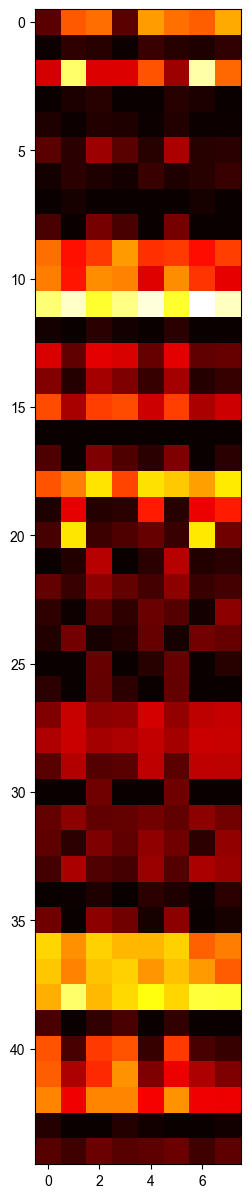

f1                      \
template                                          ext       cls   ext_def   
language   entity           model                                           
English    event triggers   chatgpt          0.082927  0.339321  0.359551   
                            gpt3             0.002963  0.039216  0.030441   
                            gpt4             0.204518  0.578171  0.213636   
                            llama2-13b       0.000000  0.019078  0.029316   
                            llama2-13b-chat  0.022825  0.003106  0.024316   
                            llama2-70b       0.083442  0.033133  0.149556   
                            llama2-70b-chat  0.011662  0.033040  0.022923   
                            llama2-7b        0.000000  0.013423  0.000000   
                            llama2-7b-chat   0.064133  0.000000  0.108959   
           time expressions chatgpt          0.358209  0.263804  0.306122   
                            gpt3             0.376147  0.270096  0.391667   
                            gpt4             0.584475  0.641860  0.538117   
                            llama2-13b       0.013245  0.000000  0.032967   
                            llama2-13b-chat  0.210909  0.089947  0.222222   
                            llama2-70b       0.122563  0.029126  0.159091   
                            llama2-70b-chat  0.325581  0.160401  0.311594   
                            llama2-7b        0.000000  0.000000  0.000000   
                            llama2-7b-chat   0.070652  0.000000  0.118380   
Portuguese event triggers   chatgpt          0.331579  0.379070  0.478589   
                            gpt3             0.022581  0.224181  0.027994   
                            gpt4             0.062500  0.481434  0.052851   
                            llama2-13b       0.000000  0.025735  0.175644   
                            llama2-13b-chat  0.091185  0.047820  0.132743   
                            llama2-70b       0.037607  0.007797  0.077295   
                            llama2-70b-chat  0.025974  0.108387  0.015699   
                            llama2-7b        0.000000  0.000000  0.093023   
                            llama2-7b-chat   0.034934  0.000000  0.092715   
           participants     chatgpt          0.120956  0.191159  0.132450   
                            gpt3             0.169713  0.194757  0.157216   
                            gpt4             0.080576  0.171563  0.074896   
                            llama2-13b       0.000000  0.000000  0.105263   
                            llama2-13b-chat  0.092827  0.133869  0.089552   
                            llama2-70b       0.085297  0.034537  0.118132   
                            llama2-70b-chat  0.059190  0.164276  0.073855   
                            llama2-7b        0.000000  0.003565  0.022825   
                            llama2-7b-chat   0.105747  0.000000  0.132822   
           time expressions chatgpt          0.464646  0.394558  0.460177   
                            gpt3             0.449438  0.380165  0.446429   
                            gpt4             0.425532  0.577320  0.435644   
                            llama2-13b       0.064516  0.000000  0.041096   
                            llama2-13b-chat  0.333333  0.065476  0.306667   
                            llama2-70b       0.342342  0.165854  0.290598   
                            llama2-70b-chat  0.384615  0.234234  0.384615   
                            llama2-7b        0.028571  0.000000  0.000000   
                            llama2-7b-chat   0.077121  0.054795  0.100313   

                                                                             \
template                                      ext_exp   cls_def ext_def_exp   
language   entity           model                                             
English    event triggers   chatgpt          0.083028  0.406032    0.360987   
                            gpt3      

In [46]:
data = df[["language", "model", "template", "entity", "f1"]].groupby(
    ["language", "entity", "model", "template"]).mean("f1")
data = data.unstack("template").fillna(0)
data = data[[('f1', "ext"),
            ('f1', "cls"),
            ('f1', "ext_def"),
            ('f1', "ext_exp"),
            ('f1', "cls_def"),
            ('f1', "ext_def_exp"),
            ('f1', "cls_exp"),
            ('f1', "cls_def_exp")]]

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(data.values, cmap='hot', interpolation='nearest')
plt.show()

data

In [47]:
(data * 100).round(2)

f1                         \
template                                       ext    cls ext_def ext_exp   
language   entity           model                                           
English    event triggers   chatgpt           8.29  33.93   35.96    8.30   
                            gpt3              0.30   3.92    3.04    0.29   
                            gpt4             20.45  57.82   21.36   21.34   
                            llama2-13b        0.00   1.91    2.93    0.00   
                            llama2-13b-chat   2.28   0.31    2.43    2.28   
                            llama2-70b        8.34   3.31   14.96    8.06   
                            llama2-70b-chat   1.17   3.30    2.29    1.17   
                            llama2-7b         0.00   1.34    0.00    0.00   
                            llama2-7b-chat    6.41   0.00   10.90    6.41   
           time expressions chatgpt          35.82  26.38   30.61   40.49   
                            gpt3             37.61  27.01   39.17   38.05   
                            gpt4             58.45  64.19   53.81   59.63   
                            llama2-13b        1.32   0.00    3.30    1.32   
                            llama2-13b-chat  21.09   8.99   22.22   21.09   
                            llama2-70b       12.26   2.91   15.91   11.80   
                            llama2-70b-chat  32.56  16.04   31.16   32.56   
                            llama2-7b         0.00   0.00    0.00    0.00   
                            llama2-7b-chat    7.07   0.00   11.84    7.03   
Portuguese event triggers   chatgpt          33.16  37.91   47.86   31.73   
                            gpt3              2.26  22.42    2.80    3.22   
                            gpt4              6.25  48.14    5.29    7.06   
                            llama2-13b        0.00   2.57   17.56    0.00   
                            llama2-13b-chat   9.12   4.78   13.27    9.12   
                            llama2-70b        3.76   0.78    7.73    3.75   
                            llama2-70b-chat   2.60  10.84    1.57    2.60   
                            llama2-7b         0.00   0.00    9.30    0.00   
                            llama2-7b-chat    3.49   0.00    9.27    3.49   
           participants     chatgpt          12.10  19.12   13.25   13.76   
                            gpt3             16.97  19.48   15.72   16.69   
                            gpt4              8.06  17.16    7.49    8.03   
                            llama2-13b        0.00   0.00   10.53    0.00   
                            llama2-13b-chat   9.28  13.39    8.96    9.28   
                            llama2-70b        8.53   3.45   11.81    8.89   
                            llama2-70b-chat   5.92  16.43    7.39    5.92   
                            llama2-7b         0.00   0.36    2.28    0.00   
                            llama2-7b-chat   10.57   0.00   13.28   10.57   
           time expressions chatgpt          46.46  39.46   46.02   43.30   
                            gpt3             44.94  38.02   44.64   46.15   
                            gpt4             42.55  57.73   43.56   46.81   
                            llama2-13b        6.45   0.00    4.11    6.45   
                            llama2-13b-chat  33.33   6.55   30.67   33.33   
                            llama2-70b       34.23  16.59   29.06   39.60   
                            llama2-70b-chat  38.46  23.42   38.46   38.46   
                            llama2-7b         2.86   0.00    0.00    2.86   
                            llama2-7b-chat    7.71   5.48   10.03    7.71   

                                                                         \
template                                    cls_def ext_def_exp cls_exp   
language   entity           model                                         
English    event triggers   chatgpt           40.60       36.10   34.22   
                            gpt3               4.85

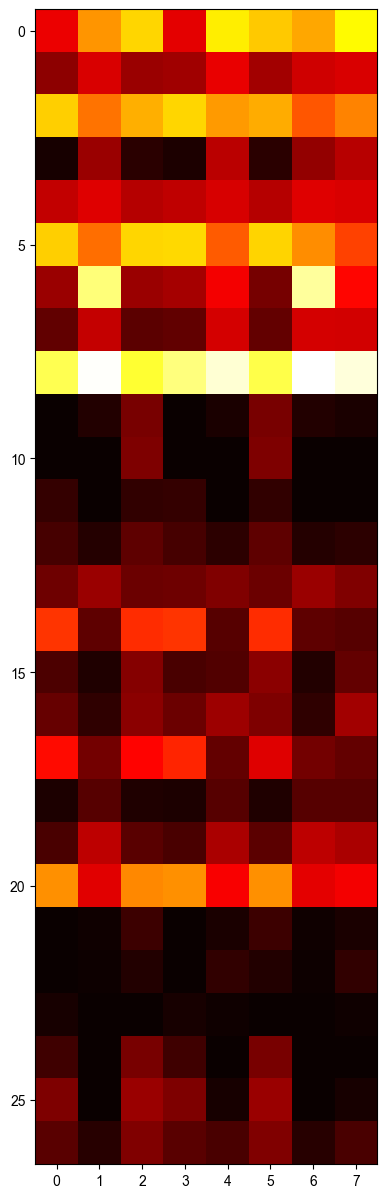

f1                                \
template                               ext       cls   ext_def   ext_exp   
model           entity                                                     
chatgpt         event triggers    0.207253  0.359196  0.419070  0.200162   
                participants      0.120956  0.191159  0.132450  0.137552   
                time expressions  0.411428  0.329181  0.383150  0.418924   
gpt3            event triggers    0.012772  0.131699  0.029218  0.017539   
                participants      0.169713  0.194757  0.157216  0.166884   
                time expressions  0.412792  0.325131  0.419048  0.421035   
gpt4            event triggers    0.133509  0.529803  0.133244  0.142009   
                participants      0.080576  0.171563  0.074896  0.080344   
                time expressions  0.505003  0.609590  0.486880  0.532208   
llama2-13b      event triggers    0.000000  0.022407  0.102480  0.000000   
                participants      0.000000  0.000000  0.105263  0.000000   
                time expressions  0.038881  0.000000  0.037031  0.038881   
llama2-13b-chat event triggers    0.057005  0.025463  0.078530  0.057005   
                participants      0.092827  0.133869  0.089552  0.092827   
                time expressions  0.272121  0.077712  0.264444  0.272121   
llama2-70b      event triggers    0.060524  0.020465  0.113426  0.059051   
                participants      0.085297  0.034537  0.118132  0.088889   
                time expressions  0.232453  0.097490  0.224845  0.257001   
llama2-70b-chat event triggers    0.018818  0.070713  0.019311  0.018818   
                participants      0.059190  0.164276  0.073855  0.059190   
                time expressions  0.355098  0.197318  0.348105  0.355098   
llama2-7b       event triggers    0.000000  0.006711  0.046512  0.000000   
                participants      0.000000  0.003565  0.022825  0.000000   
                time expressions  0.014286  0.000000  0.000000  0.014286   
llama2-7b-chat  event triggers    0.049534  0.000000  0.100837  0.049534   
                participants      0.105747  0.000000  0.132822  0.105747   
                time expressions  0.073886  0.027397  0.109347  0.073696   

                                                                              
template                           cls_def ext_def_exp   cls_exp cls_def_exp  
model           entity                                                        
chatgpt         event triggers    0.440516    0.406789  0.376154    0.453200  
                participants      0.204363    0.139657  0.180505    0.190588  
                time expressions  0.364612    0.382631  0.303364    0.343307  
gpt3            event triggers    0.161383    0.030359  0.126111    0.158331  
                participants      0.186567    0.156812  0.194271    0.191304  
                time expressions  0.307872    0.418056  0.352298    0.282323  
gpt4            event triggers    0.213900    0.099402  0.552063    0.228332  
                participants      0.184510    0.083102  0.184364    0.182648  
                time expressions  0.585012    0.500505  0.612262    0.589441  
llama2-13b      event triggers    0.015974    0.102480  0.022407    0.015974  
                participants      0.000000    0.105263  0.000000    0.000000  
                time expressions  0.000000    0.037031  0.000000    0.000000  
llama2-13b-chat event triggers    0.031884    0.078530  0.025468    0.031884  
                participants      0.108033    0.089552  0.133869    0.108033  
                time expressions  0.069916    0.264444  0.077593    0.069916  
llama2-70b      event triggers    0.064800    0.118713  0.021567    0.082945  
                participants      0.135922    0.105997  0.034537    0.139591  
                time expressions  0.081985    0.194152  0.097687    0.081985  
llama2-70b-chat event triggers    0.071333    0.019323  0.069646    0.071718  
                parti

In [36]:
data = df[["model", "language", "template", "entity", "f1"]].groupby(["model", "template", "entity"]).mean("f1")
data = data.unstack("template").fillna(0)
data = data[[('f1', "ext"),
            ('f1', "cls"),
            ('f1', "ext_def"),
            ('f1', "ext_exp"),
            ('f1', "cls_def"),
            ('f1', "ext_def_exp"),
            ('f1', "cls_exp"),
            ('f1', "cls_def_exp")]]


fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(data.values, cmap='hot', interpolation='nearest')
plt.show()

data